In [1]:
import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.io import ascii
from astroquery.gaia import Gaia
import matplotlib.pyplot as plt
import numpy as np
from astropy.coordinates import Angle
Gaia.ROW_LIMIT = -1

In [2]:
from matplotlib import rcParams
rcParams['font.family'] = 'CMU Serif'
rcParams['mathtext.fontset'] = 'cm'
plt.rc('axes', unicode_minus=False)

In [3]:
coord = SkyCoord("01h33m50.8965749232s +30d39m36.630403128s", frame='icrs')
width = u.Quantity(3, u.arcmin)
height = u.Quantity(3, u.arcmin)
r = Gaia.query_object_async(coordinate=coord, width=width, height=height)

INFO: Query finished. [astroquery.utils.tap.core]


In [44]:
r

dist,solution_id,DESIGNATION,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,astrometric_sigma5d_max,frame_rotator_object_type,matched_observations,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url
,,,,,yr,deg,mas,deg,mas,mas,mas,,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,,,,,,,mas,,,,1 / mas2,1 / um,1 / um,,,,mas,,,,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,,mag,mag,mag,km / s,km / s,,K,log(cm.s**-2),dex,,deg,deg,deg,deg,,K,K,K,mag,mag,mag,mag,mag,mag,,solRad,solRad,solRad,solLum,solLum,solLum,,
float64,int64,object,int64,int64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,int32,int32,float32,float32,float64,float64,int16,bool,float32,float64,float64,float32,int16,int16,float32,int32,int16,bool,int32,float64,float64,float32,float32,int32,float64,float64,float32,float32,int32,float64,float64,float32,float32,float32,int16,float32,float32,float32,float64,float64,int32,float32,float32,float32,object,float64,float64,float64,float64,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,float32,float32,float32,float32,float32,float32,object,object
0.013965598860813614,1635721458409799680,Gaia DR2 303379898335235072,303379898335235072,1576303826,2015.5,23.47220681147176,0.03423460841799171,30.67109071124196,0.03059346046774391,1.1856247422883022,0.04109598319293369,28.850138,-4.480236839601162,0.06678903514072208,-5.647342393627548,0.0612300767826897,0.20205566,0.40173233,-0.13307635,0.040097076,0.13609338,-0.11214257,-0.12941043,-0.020436013,0.32351157,0.14811325,123,87,121,2,3.3788016,174.57346,0.0,0.0,31,True,168.3735,1.6612373281245334,0.009447043919662572,-0.021781575,14,9,0.04904504,0,14,False,120,131031.67457195127,44.4312487815648,2949.0884,12.894925,14,78529.33942189495,151.3214180704005,518.9572,13.113809,14,80154.06657225234,119.2379319018679,672.21954,12.502106,1.2110308,0,0.6117029,0.21888351,0.3928194,--,--,0,--,--,--,NOT_AVAILABLE,133.61775547428795,-31.31829631595936,33.248728554612924,19.37461848683835,100001,6452.3335,6186.3677,6714.49,0.613,0.2009,0.9161,0.282,0.0929,0.443,200111,1.519804,1.403444,1.6532927,3.606925,3.4064648,3.8073852,https://gea.esac.esa.int/data-server/datalink/links?ID=http%3A%2F%2Fgeadata.esac.esa.int%2Fdata-server%2Fdatalink%2Flinks%3FID%3D303379898335235072,
6.936115075062498e-06,1635721458409799680,Gaia DR2 303379863975504512,303379863975

In [4]:
g_max = np.max(r['phot_g_mean_mag'])
g_min = np.min(r['phot_g_mean_mag'])

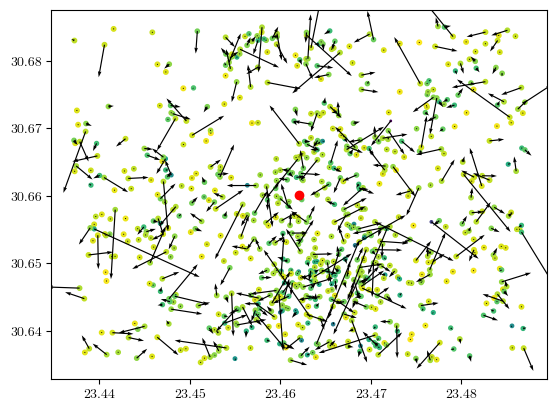

In [5]:
ra0 = Angle("01h33m50.8965749232s")
dec0 = Angle("+30d39m36.630403128s")
fig, ax = plt.subplots(1, 1)
ax.scatter(r['ra'], r['dec'], s=1+10*(r['phot_g_mean_mag'] - g_min)/(g_max - g_min), c=(r['phot_g_mean_mag'] - g_min)/(g_max - g_min))
#plt.quiver(np.array(r['ra'][mask]), np.array(r['dec'][mask]), np.array(r['pmra'][mask]), np.array(r['pmdec'][mask]))
ax.quiver(r['ra'].filled(0), r['dec'].filled(0), r['pmra'].filled(0), r['pmdec'].filled(0))
ax.scatter(ra0.to(u.deg), dec0, c='red')
fig.savefig("quiver.png", dpi=300)
plt.show()

In [29]:
r.sort('phot_g_mean_mag')
_100stars = r[:100]
_100stars

dist,solution_id,DESIGNATION,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,astrometric_sigma5d_max,frame_rotator_object_type,matched_observations,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url
,,,,,yr,deg,mas,deg,mas,mas,mas,,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,,,,,,,mas,,,,1 / mas2,1 / um,1 / um,,,,mas,,,,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,electron / s,electron / s,,mag,,,mag,mag,mag,km / s,km / s,,K,log(cm.s**-2),dex,,deg,deg,deg,deg,,K,K,K,mag,mag,mag,mag,mag,mag,,solRad,solRad,solRad,solLum,solLum,solLum,,
float64,int64,object,int64,int64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,int32,int32,int32,float32,float32,float64,float64,int16,bool,float32,float64,float64,float32,int16,int16,float32,int32,int16,bool,int32,float64,float64,float32,float32,int32,float64,float64,float32,float32,int32,float64,float64,float32,float32,float32,int16,float32,float32,float32,float64,float64,int32,float32,float32,float32,object,float64,float64,float64,float64,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,float32,float32,float32,float32,float32,float32,object,object
0.013965598860813614,1635721458409799680,Gaia DR2 303379898335235072,303379898335235072,1576303826,2015.5,23.47220681147176,0.03423460841799171,30.67109071124196,0.03059346046774391,1.1856247422883022,0.04109598319293369,28.850138,-4.480236839601162,0.06678903514072208,-5.647342393627548,0.0612300767826897,0.20205566,0.40173233,-0.13307635,0.040097076,0.13609338,-0.11214257,-0.12941043,-0.020436013,0.32351157,0.14811325,123,87,121,2,3.3788016,174.57346,0.0,0.0,31,True,168.3735,1.6612373281245334,0.009447043919662572,-0.021781575,14,9,0.04904504,0,14,False,120,131031.67457195127,44.4312487815648,2949.0884,12.894925,14,78529.33942189495,151.3214180704005,518.9572,13.113809,14,80154.06657225234,119.2379319018679,672.21954,12.502106,1.2110308,0,0.6117029,0.21888351,0.3928194,--,--,0,--,--,--,NOT_AVAILABLE,133.61775547428795,-31.31829631595936,33.248728554612924,19.37461848683835,100001,6452.3335,6186.3677,6714.49,0.613,0.2009,0.9161,0.282,0.0929,0.443,200111,1.519804,1.403444,1.6532927,3.606925,3.4064648,3.8073852,https://gea.esac.esa.int/data-server/datalink/links?ID=http%3A%2F%2Fgeadata.esac.esa.int%2Fdata-server%2Fdatalink%2Flinks%3FID%3D303379898335235072,
6.936115075062498e-06,1635721458409799680,Gaia DR2 303379863975504512,303379863975

In [26]:
from astroquery.vizier import Vizier
Vizier.ROW_LIMIT = -1
cat_names = ['2MASS', 'MSX', 'WISE', 'PanStarrs']
cats = []
for i in range(len(cat_names)):
    cats.append(Vizier.query_region(coord, radius=3*np.sqrt(2)*u.arcmin, catalog=cat_names[i])[0].meta["name"])

In [33]:
cats[1]

'V/114/msx6_main'

In [42]:
from astroquery.xmatch import XMatch
match1 = XMatch.query(cat1=r, cat2=f'vizier:{cats[0]}', max_distance=2 * u.arcsec, colRA1='ra', colDec1='dec')
match1

angDist,dist,solution_id,DESIGNATION,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,astrometric_sigma5d_max,frame_rotator_object_type,matched_observations,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,2MASS,RAJ2000,DEJ2000,errHalfMaj,errHalfMin,errPosAng,Jmag,Hmag,Kmag,e_Jmag,e_Hmag,e_Kmag,Qfl,Rfl,X,MeasureJD
float64,float64,int64,str27,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,float64,float64,float64,float64,int64,str5,float64,float64,float64,float64,int64,int64,float64,int64,int64,str5,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,int64,int64,int64,int64,str13,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,str147,int64,str16,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,str3,int64,int64,float64
0.046567,0.013965598860813614,1635721458409799680,Gaia DR2 303379898335235072,303379898335235072,1576303826,2015.5,23.47220681147176,0.03423460841799171,30.67109071124196,0.03059346046774391,1.1856247422883022,0.04109598319293369,28.85013771057129,-4.480236839601162,0.06678903514072208,-5.647342393627548,0.0612300767826897,0.2020556628704071,0.40173232555389404,-0.13307635486125946,0.04009707644581795,0.1360933780670166,-0.11214257031679153,-0.12941043078899384,-0.020436013117432594,0.3235115706920624,0.14811325073242188,123,87,121,2,3.3788015842437744,174.57345581054688,0.0,0.0,31,true,168.37350463867188,1.6612373281245334,0.009447043919662572,-0.021781574934720993,14,9,0.04904504120349884,0,14,false,120,131031.67457195127,44.4312487815648,2949.08837890625,12.894925117492676,14,78529.33942189495,151.3214180704005,518.9572143554688,13.113808631896973,14,80154.06657225234,119.2379319018679,672.2195434570312,12.502105712890625,1.2110308408737183,0,0.6117029190063477,0.21888351440429688,0.3928194046020508,--,--,0,--,--,--,NOT_AVAILABLE,133.61775547428795,-31.31829631595936,33.248728554612924,19.37461848683835,100001,6452.33349609375,6186.36767578125,6714.490234375,0.6129999756813049,0.20090000331401825,0.916100025177002,0.28200000524520874,0.09290000051259995,0.4429999887943268,200111,1.5198040008544922,1.4034440517425537,1.6532926559448242,3.6069250106811523,3.406464815

In [50]:
match2 = XMatch.query(cat1=match1, cat2=f'vizier:{cats[1]}', max_distance=20 * u.arcsec, colRA1='ra', colDec1='dec')
match2

angDist_1,angDist_2,dist,solution_id,DESIGNATION,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,astrometric_sigma5d_max,frame_rotator_object_type,matched_observations,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,2MASS,RAJ2000_1,DEJ2000_1,errHalfMaj,errHalfMin,errPosAng,Jmag,Hmag,Kmag,e_Jmag,e_Hmag,e_Kmag,Qfl,Rfl,X,MeasureJD,_RAJ2000,_DEJ2000,MSX6C,RAJ2000_2,DEJ2000_2,ePos,B1,q_B1,B2,q_B2,A,q_A,C,q_C,D,q_D,E,q_E
float64,float64,float64,int64,str27,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,float64,float64,float64,float64,int64,str5,float64,float64,float64,float64,int64,int64,float64,int64,int64,str5,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,int64,int64,int64,int64,str13,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,str147,int64,str16,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,str3,int64,int64,float64,float64,float64,str17,float64,float64,float64,float64,int64,float64,int64,float64,int64,float64,int64,float64,int64,float64,int64
8.224701,0.069866,0.009205538873583158,1635721458409799680,Gaia DR2 303379863975511168,303379863975511168,732712115,2015.5,23.468263201778644,0.07420100153720986,30.65266251750911,0.06547017887985213,-0.05884338366150941,0.08745372745361796,-0.6728516221046448,-0.16789864723004377,0.1683148107165804,-0.6166737160353792,0.1251809168882726,0.13051968812942505,0.19920754432678223,-0.09054536372423172,0.05284161865711212,0.03416978567838669,-0.04180087894201279,0.1562383472919464,-0.0400170162320137,0.3752894401550293,0.07980383187532425,123,0,123,0,1.9178916215896606,149.20254516601562,0.24112380195973473,1.8149180483998346,31,false,3.8123881816864014,1.6913970999068562,0.021047463238570603,-0.012262359261512756,14,9,0.15365996956825256,0,14,false,121,5150.890214725237,45.904030590656944,112.20997619628906,16.408660888671875,14,4668.232651584565,139.35426582179696,33.49903106689453,16.17850685119629,12,4394.051354056068,48.64463700546054,90.3296127319336,15.654757499694824,1.7593626976013184,0,0.5237493515014648,-0.23015403747558594,0.7539033889770508,--,--,0,--,--,--,NOT_AVAILABLE,133.6179968420329,-31.337032997816006,33.23785801733434,19.358936269746913,

In [52]:
match3 = XMatch.query(cat1=match2, cat2=f'vizier:{cats[2]}', max_distance=10 * u.arcsec, colRA1='ra', colDec1='dec')
match3

angDist,angDist_1,angDist_2,dist,solution_id,DESIGNATION,source_id,random_index,ref_epoch,ra_1,ra_error,dec_1,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,astrometric_sigma5d_max,frame_rotator_object_type,matched_observations,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,2MASS,RAJ2000_1,DEJ2000_1,errHalfMaj_1,errHalfMin_1,errPosAng_1,Jmag_1,Hmag_1,Kmag_1,e_Jmag_1,e_Hmag_1,e_Kmag_1,Qfl,Rfl,X,MeasureJD,_RAJ2000,_DEJ2000,MSX6C,RAJ2000_2,DEJ2000_2,ePos,B1,q_B1,B2,q_B2,A,q_A,C,q_C,D,q_D,E,q_E,JNAME,ra_2,dec_2,errHalfMaj_2,errHalfMin_2,errPosAng_2,W1mag,W2mag,W3mag,W4mag,Jmag_2,Hmag_2,Kmag_2,e_W1mag,e_W2mag,e_W3mag,e_W4mag,e_Jmag_2,e_Hmag_2,e_Kmag_2,cntr,cc_flags,ext_flg,var_flg,ph_qual,r_2mass
float64,float64,float64,float64,int64,str27,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,float64,float64,float64,float64,int64,str5,float64,float64,float64,float64,int64,int64,float64,int64,int64,str5,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,int64,int64,int64,int64,str13,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,str147,int64,str16,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,str3,int64,int64,float64,float64,float64,str17,float64,float64,float64,float64,int64,float64,int64,float64,int64,float64,int64,float64,int64,float64,int64,str19,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,str4,int64,str4,str4,float64
7.295277,8.224701,0.069866,0.009205538873583158,1635721458409799680,Gaia DR2 303379863975511168,303379863975511168,732712115,2015.5,23.468263201778644,0.07420100153720986,30.65266251750911,0.06547017887985213,-0.05884338366150941,0.08745372745361796,-0.6728516221046448,-0.16789864723004377,0.1683148107165804,-0.6166737160353792,0.1251809168882726,0.13051968812942505,0.19920754432678223,-0.09054536372423172,0.05284161865711212,0.03416978567838669,-0.04180087894201279,0.1562383472919464,-0.0400170162320137,0.3752894401550293,0.07980383187532425,123,0,123,0,1.9178916215896606,149.20254516601562,0.24112380195973473,1.8149180483998346,31,false,3.8123881816864014,1.6913970999068562,0.021047463238570603,-0.012262359261512756,14,9,0.15

In [63]:
match4 = XMatch.query(cat1=match2, cat2=f'vizier:{cats[3]}', max_distance= 0.5 * u.arcsec, colRA1='ra', colDec1='dec')
match4

angDist,angDist_1,angDist_2,dist,solution_id,DESIGNATION,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,astrometric_sigma5d_max,frame_rotator_object_type,matched_observations,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,datalink_url,epoch_photometry_url,2MASS,RAJ2000_1,DEJ2000_1,errHalfMaj_1,errHalfMin_1,errPosAng_1,Jmag,Hmag,Kmag,e_Jmag,e_Hmag,e_Kmag,Qfl,Rfl,X,MeasureJD,_RAJ2000,_DEJ2000,MSX6C,RAJ2000_2,DEJ2000_2,ePos,B1,q_B1,B2,q_B2,A,q_A,C,q_C,D,q_D,E,q_E,objID,RAJ2000,DEJ2000,errHalfMaj_2,errHalfMin_2,errPosAng_2,f_objID,Qual,Epoch,Ns,Nd,gmag,e_gmag,gKmag,e_gKmag,gFlags,rmag,e_rmag,rKmag,e_rKmag,rFlags,imag,e_imag,iKmag,e_iKmag,iFlags,zmag,e_zmag,zKmag,e_zKmag,zFlags,ymag,e_ymag,yKmag,e_yKmag,yFlags
float64,float64,float64,float64,int64,str27,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,float64,float64,float64,float64,int64,str5,float64,float64,float64,float64,int64,int64,float64,int64,int64,str5,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,int64,int64,int64,int64,str13,float64,float64,float64,float64,int64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,int64,str147,int64,str16,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,str3,int64,int64,float64,float64,float64,str17,float64,float64,float64,float64,int64,float64,int64,float64,int64,float64,int64,float64,int64,float64,int64,int64,float64,float64,float64,float64,int64,int64,int64,float64,int64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,int64,float64,float64,float64,float64,int64
0.0052,8.224701,0.069866,0.009205538873583158,1635721458409799680,Gaia DR2 303379863975511168,303379863975511168,732712115,2015.5,23.468263201778644,0.07420100153720986,30.65266251750911,0.06547017887985213,-0.05884338366150941,0.08745372745361796,-0.6728516221046448,-0.16789864723004377,0.1683148107165804,-0.6166737160353792,0.1251809168882726,0.13051968812942505,0.19920754432678223,-0.09054536372423172,0.05284161865711212,0.03416978567838669,-0.04180087894201279,0.1562383472919464,-0.0400170162320137,0.3752894401550293,0.07980383187532425,123,0,123,0,1.9178916215896606,149.20254516601562,0.24112380195973473,1.81491804839983